### Análise de Parcelamento com Base em Impacto Mensal e Taxa de Juros

In [1]:
## Importação de Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Levantamento de dados preliminares

Uma loja oferece um sistema de parcelamento flexível para seus clientes. Nesse modelo, o valor da primeira parcela é sempre fixo em R$ 121,01, enquanto o valor total da compra varia conforme a quantidade de parcelas escolhida. O restante do valor é dividido igualmente entre as parcelas subsequentes.

Dado um conjunto de valores totais correspondentes a diferentes opções de parcelamento (de 1 a 25 parcelas), deseja-se analisar o comportamento do valor total da compra em relação ao número de parcelas. Identifique com base nos valores qual o melhor parcelamento.

In [7]:
# Dados fornecidos
num_parcelas_exp = np.arange(1, 26)  # Parcelas de 1 a 25
valor_total_exp = np.array([
    3071.02, 3387.92, 3399.42, 3410.93, 3422.48, 3585.71, 3597.84, 3610.00, 3622.19, 3788.26,
    3801.04, 3813.87, 3826.69, 3839.53, 3852.42, 3865.32, 3878.22, 3891.16, 3904.11, 3917.09,
    3930.12, 3943.10, 3956.17, 3969.28, 3982.36
])

# Primeira parcela fixa
primeira_parcela = 121.01
restante = valor_total_exp - primeira_parcela

# Criar DataFrame com os dados
parcelas_data = pd.DataFrame({
    "Número de Parcelas": num_parcelas_exp,
    "Valor Total (R$)": valor_total_exp,
    "Primeira Parcela (R$)": [primeira_parcela] * len(num_parcelas_exp),
    "Restante (R$)": restante
})

### Cálculos do parcelamento

In [3]:
# Calcular Redução da Parcela
parcelas_data["Redução Parcela (R$)"] = parcelas_data["Restante (R$)"].diff().abs()

# 1. Custo Total Acumulado por Parcela
parcelas_data["Custo Total (%)"] = (parcelas_data["Valor Total (R$)"] / valor_total_exp[0] - 1) * 100

# 2. Impacto Mensal no Orçamento
parcelas_data["Valor Mensal Médio (R$)"] = parcelas_data["Restante (R$)"] / parcelas_data["Número de Parcelas"]

# 3. Taxa de Juros Implícita
valor_inicial_financiado = valor_total_exp[0]
parcelas_data["Taxa de Juros Mensal (%)"] = (
    (parcelas_data["Valor Total (R$)"] - valor_inicial_financiado) / valor_inicial_financiado
) / parcelas_data["Número de Parcelas"] * 100

### Gráficos e análises

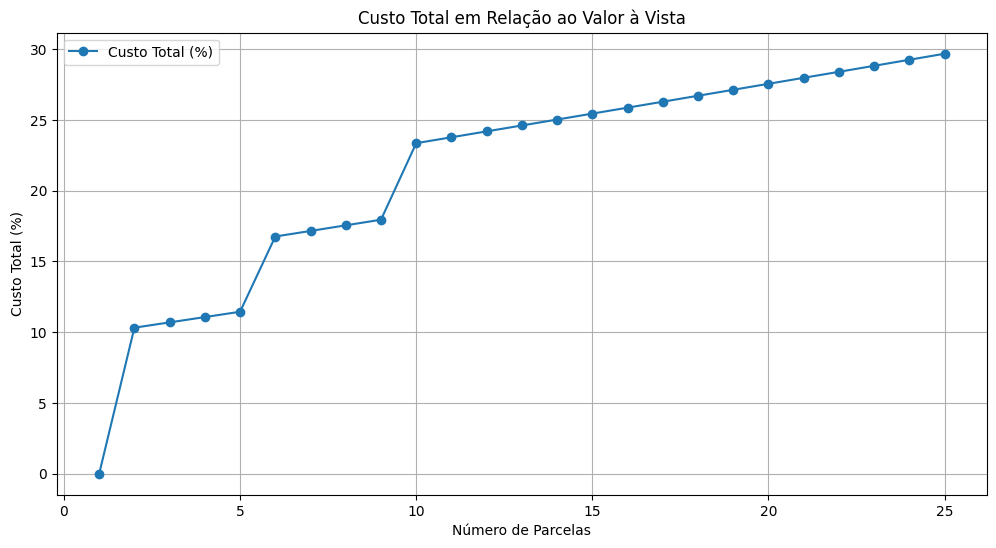

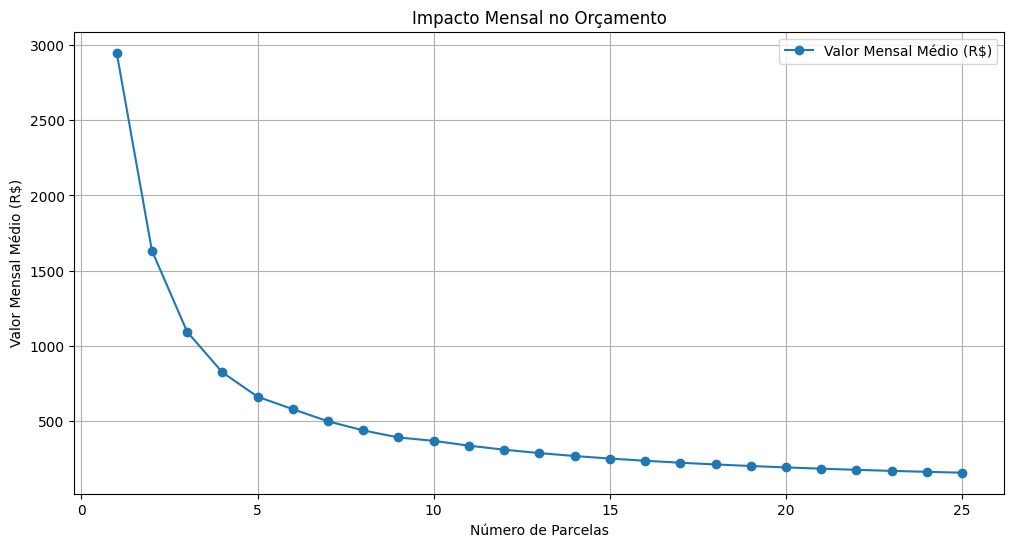

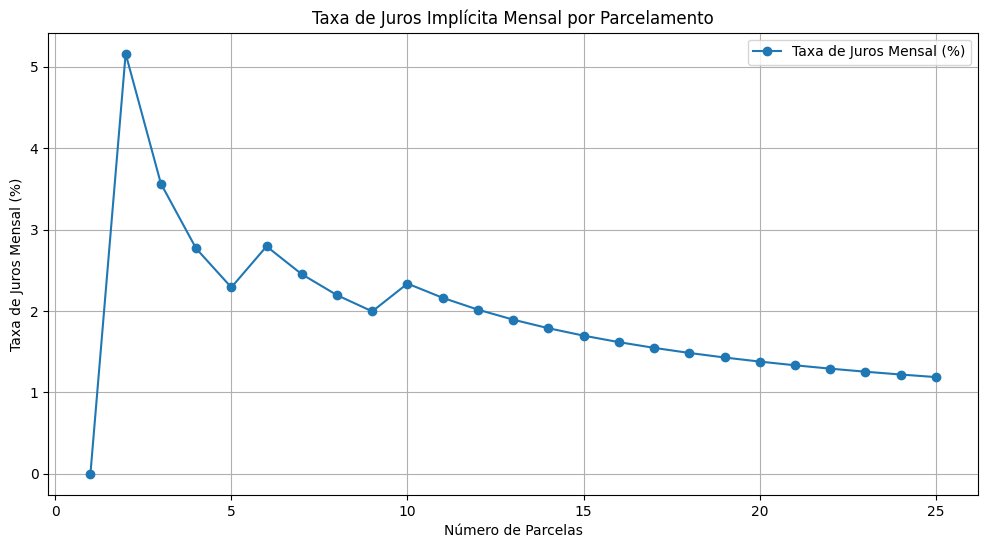

In [4]:
# Gráficos
plt.figure(figsize=(12, 6))
plt.plot(parcelas_data["Número de Parcelas"], parcelas_data["Custo Total (%)"], marker="o", label="Custo Total (%)")
plt.title("Custo Total em Relação ao Valor à Vista")
plt.xlabel("Número de Parcelas")
plt.ylabel("Custo Total (%)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(parcelas_data["Número de Parcelas"], parcelas_data["Valor Mensal Médio (R$)"], marker="o", label="Valor Mensal Médio (R$)")
plt.title("Impacto Mensal no Orçamento")
plt.xlabel("Número de Parcelas")
plt.ylabel("Valor Mensal Médio (R$)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(parcelas_data["Número de Parcelas"], parcelas_data["Taxa de Juros Mensal (%)"], marker="o", label="Taxa de Juros Mensal (%)")
plt.title("Taxa de Juros Implícita Mensal por Parcelamento")
plt.xlabel("Número de Parcelas")
plt.ylabel("Taxa de Juros Mensal (%)")
plt.grid(True)
plt.legend()
plt.show()

### Cruzamento de Impacto Mensal e Taxa de Juros Implícita

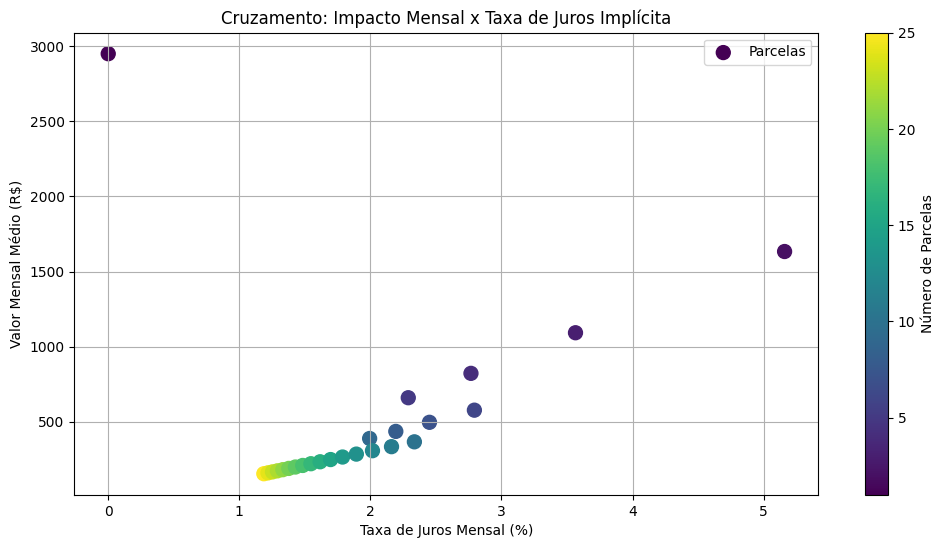

In [5]:
cruzado_data = parcelas_data[["Número de Parcelas", "Valor Mensal Médio (R$)", "Taxa de Juros Mensal (%)"]].copy()
cruzado_data = cruzado_data.sort_values(by=["Taxa de Juros Mensal (%)", "Valor Mensal Médio (R$)"])

plt.figure(figsize=(12, 6))
plt.scatter(
    cruzado_data["Taxa de Juros Mensal (%)"], cruzado_data["Valor Mensal Médio (R$)"],
    c=cruzado_data["Número de Parcelas"], cmap='viridis', s=100, label="Parcelas"
)
plt.colorbar(label="Número de Parcelas")
plt.title("Cruzamento: Impacto Mensal x Taxa de Juros Implícita")
plt.xlabel("Taxa de Juros Mensal (%)")
plt.ylabel("Valor Mensal Médio (R$)")
plt.grid(True)
plt.legend()
plt.show()

### Recomendação Final

In [6]:
print("Recomenda-se o parcelamento em 25 vezes, devido ao menor impacto mensal combinado com uma taxa de juros reduzida.")

Recomenda-se o parcelamento em 25 vezes, devido ao menor impacto mensal combinado com uma taxa de juros reduzida.
